In [1]:
from tokenize import Special
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import math
import random
import scipy
import seaborn as sns
import sklearn.manifold
from math import floor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train_set = pd.read_csv("learning2.csv")
test_set = pd.read_csv('modeltesting.csv')
val_set = pd.read_csv('modelvalidation.csv')

In [31]:
train_set.shape

(484848, 54)

In [30]:
train_set = train_set[train_set['date']>'2014-01-01']

In [5]:
train_set.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fips', 'date', 'PRECTOT', 'PS', 'QV2M',
       'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE', 'score', 'lat', 'lon', 'elevation',
       'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7',
       'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown',
       'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4',
       'SQ5', 'SQ6', 'SQ7'],
      dtype='object')

In [6]:
train_set=train_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])

In [7]:
for i in range(len(train_set.columns)):
    print(i,train_set.columns[i])

0 PRECTOT
1 PS
2 QV2M
3 T2M
4 T2MDEW
5 T2MWET
6 T2M_MAX
7 T2M_MIN
8 T2M_RANGE
9 TS
10 WS10M
11 WS10M_MAX
12 WS10M_MIN
13 WS10M_RANGE
14 WS50M
15 WS50M_MAX
16 WS50M_MIN
17 WS50M_RANGE
18 score
19 lat
20 lon
21 elevation
22 slope1
23 slope2
24 slope3
25 slope4
26 slope5
27 slope6
28 slope7
29 slope8
30 aspectN
31 aspectE
32 aspectS
33 aspectW
34 WAT_LAND
35 NVG_LAND
36 URB_LAND
37 GRS_LAND
38 FOR_LAND
39 CULTRF_LAND
40 CULTIR_LAND
41 SQ1
42 SQ2
43 SQ3
44 SQ4
45 SQ5
46 SQ6
47 SQ7


In [8]:
train_set['score']= train_set['score'].apply(np.floor)
y_train = train_set['score']
print(y_train.shape)
train_set=train_set.drop(columns=['score'])

(484848,)


In [9]:
scaler = StandardScaler()
scaler.fit(train_set)
normalized_train_set = scaler.transform(train_set)

In [10]:
train_set_1 = pd.DataFrame(data=normalized_train_set)
print(train_set_1.columns)
train_set_1

RangeIndex(start=0, stop=47, step=1)


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.444420,0.964564,-1.460203,-1.733040,-2.160148,-2.088628,-1.774375,-1.635039,-0.746275,-1.724433,...,-0.832245,0.872910,-0.242063,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,0.703030
1,-0.342316,0.629371,-0.518734,-0.380628,-0.202607,-0.206445,-0.325184,-0.390934,0.120168,-0.410210,...,-0.832245,0.872910,-0.242063,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,0.703030
2,-0.444420,0.631212,-0.899805,-0.827255,-0.802757,-0.804504,-0.847200,-1.129907,0.624093,-0.818923,...,-0.832245,0.872910,-0.242063,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,0.703030
3,-0.087056,0.778550,-1.295140,-1.503014,-1.561880,-1.555863,-1.778640,-1.249568,-1.844113,-1.473391,...,-0.832245,0.872910,-0.242063,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,0.703030
4,0.501637,0.634896,0.011097,-0.167608,0.266789,0.264810,-0.158003,-0.331560,0.456975,-0.162692,...,-0.832245,0.872910,-0.242063,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,0.703030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484843,-0.438039,-2.610215,-1.225854,-1.546871,-1.587278,-1.590876,-1.726609,-1.369228,-1.350472,-1.536812,...,-1.144097,-0.895355,-0.340677,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,-0.279884
484844,-0.423681,-2.588114,-1.486694,-2.235160,-2.461164,-2.408476,-2.182093,-2.101807,-0.661431,-2.206256,...,-1.144097,-0.895355,-0.340677,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,-0.279884
484845,-0.441230,-2.538388,-1.386842,-2.020349,-2.040683,-2.034689,-1.827259,-1.898110,-0.165219,-2.115528,...,-1.144097,-0.895355,-0.340677,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,-0.279884
484846,-0.393368,-2.490503,-1.115813,-1.392923,-1.355873,-1.361872,-1.370922,-1.419467,-0.139508,-1.498055,...,-1.144097,-0.895355,-0.340677,-0.696872,-0.542166,-0.281171,-0.347023,-0.159427,-0.14777,-0.279884


In [11]:
for i in range(len(train_set_1.columns)):
    print(i,train_set_1.columns[i])

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46


In [12]:
train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])


In [13]:
train_set_1.shape

(484848, 25)

In [14]:
pca=PCA(n_components=4)
train_set_1=pca.fit_transform(train_set_1)


In [15]:
test_set.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fips', 'date', 'PRECTOT', 'PS', 'QV2M',
       'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE', 'lat', 'lon', 'elevation', 'slope1',
       'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8',
       'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6',
       'SQ7'],
      dtype='object')

In [34]:
test_set =test_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
scaler = StandardScaler()
scaler.fit(test_set)
normalized_test_set = scaler.transform(test_set)
test_set_1 = pd.DataFrame(data=normalized_test_set)
test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
test_set_1.shape


(326340, 25)

In [35]:
pca=PCA(n_components=4)
test_set_1=pca.fit_transform(test_set_1)

In [4]:
y_test = pd.read_csv('modeltestingy.csv')
y_val = pd.read_csv('modelvalidationy.csv')

In [5]:
y_test=y_test.drop(columns=['Unnamed: 0'])
y_val = y_val.drop(columns=['Unnamed: 0'])

In [6]:
y_test=y_test.apply(np.floor)
y_val=y_val.apply(np.floor)


In [39]:
y_test.value_counts()

score
0.0      266217
1.0       34552
2.0       16698
3.0        6691
4.0        1957
5.0         225
dtype: int64

In [22]:
SVM = LinearSVC(C=1,dual=False,tol=1e-4,
            class_weight='balanced',verbose=1)
SVM.fit(train_set_1,y_train)

[LibLinear]

LinearSVC(C=1, class_weight='balanced', dual=False, verbose=1)

In [23]:
pred = SVM.predict(test_set_1)

In [24]:
pred = pd.DataFrame(data=pred)

In [25]:
pred.value_counts()

0.0    273269
5.0     38363
4.0     11357
3.0      3045
2.0       306
dtype: int64

In [26]:
precision_recall_fscore_support(y_test,pred,average='weighted',zero_division=0)

(0.7093553252109482, 0.7240699883557027, 0.713962256616295, None)

In [27]:
accuracy_score(y_test,pred)

0.7240699883557027

<AxesSubplot:>

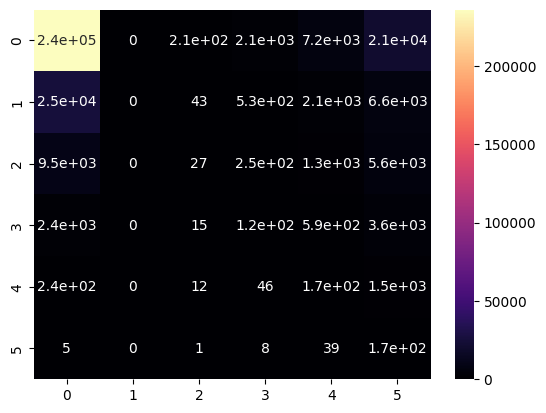

In [28]:
matrix= confusion_matrix(y_test,pred)
sns.heatmap(matrix,cmap='magma',annot=True)

# Different DATE

In [32]:
train_set = pd.read_csv("learning2.csv")
test_set = pd.read_csv('modeltesting.csv')
val_set = pd.read_csv('modelvalidation.csv')

In [35]:
def RunModel(date,components):
    train_set = pd.read_csv("learning2.csv")
    test_set = pd.read_csv('modeltesting.csv')
    val_set = pd.read_csv('modelvalidation.csv')
    train_set = train_set[train_set['date']>date]
    print(train_set.shape)
    train_set=train_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    train_set['score']= train_set['score'].apply(np.floor)
    y_train = train_set['score']
    print(y_train.shape)

    train_set=train_set.drop(columns=['score'])
    scaler = StandardScaler()
    scaler.fit(train_set)
    normalized_train_set = scaler.transform(train_set)
    train_set_1 = pd.DataFrame(data=normalized_train_set)
    train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    
    test_set =test_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    scaler = StandardScaler()
    scaler.fit(test_set)
    normalized_test_set = scaler.transform(test_set)
    test_set_1 = pd.DataFrame(data=normalized_test_set)
    test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    print(test_set_1.shape)
    
    pca=PCA(n_components=components)
    train_set_1=pca.fit_transform(train_set_1)
    pca=PCA(n_components=components)
    test_set_1=pca.fit_transform(test_set_1)
    SVM = LinearSVC(C=1,dual=False,tol=1e-4,
            class_weight='balanced',verbose=1)
    SVM.fit(train_set_1,y_train)
    pred = SVM.predict(train_set_1)
    pred = pd.DataFrame(data=pred)
    print(pred.value_counts())
    print(precision_recall_fscore_support(y_train,pred,average='weighted',zero_division=0))
    print(accuracy_score(y_train,pred))
    print(classification_report(y_train,pred))
    matrix= confusion_matrix(y_train,pred)
    sns.heatmap(matrix,cmap='magma',annot=True)

(323232, 54)
(323232,)
(326340, 25)
[LibLinear]0.0    282583
5.0     39314
4.0      4404
3.0        39
dtype: int64
(0.6974622998593819, 0.7410645339216768, 0.7182959778407122, None)
0.7410645339216768


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.00      0.00      0.00     16698
         3.0       0.00      0.00      0.00      6691
         4.0       0.01      0.03      0.02      1957
         5.0       0.01      0.91      0.01       225

    accuracy                           0.74    326340
   macro avg       0.15      0.31      0.15    326340
weighted avg       0.70      0.74      0.72    326340



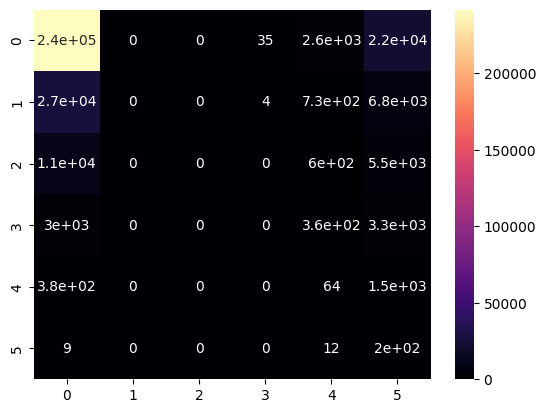

In [57]:
RunModel('2015-01-01',4)


In [32]:
RunModel('2014-01-01',4)


KeyboardInterrupt: 

(646464, 54)
(646464,)
(326340, 25)
[LibLinear]0.0    264118
5.0     41638
4.0     17219
3.0      3365
dtype: int64
(0.7094078455374898, 0.7045351473922903, 0.7063040270378899, None)
0.7045351473922903


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.00      0.00      0.00     16698
         3.0       0.05      0.03      0.04      6691
         4.0       0.01      0.11      0.02      1957
         5.0       0.01      0.97      0.01       225

    accuracy                           0.70    326340
   macro avg       0.16      0.33      0.16    326340
weighted avg       0.71      0.70      0.71    326340



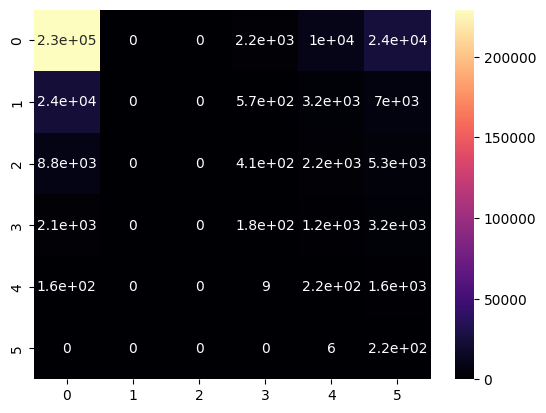

In [59]:
RunModel('2013-01-01',4)


(811188, 54)
(811188,)
(326340, 25)
[LibLinear]0.0    260996
5.0     44097
4.0     13834
3.0      7413
dtype: int64
(0.7103499754203758, 0.6973524544953117, 0.7034155132262182, None)
0.6973524544953117


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.00      0.00      0.00     16698
         3.0       0.06      0.07      0.07      6691
         4.0       0.00      0.03      0.01      1957
         5.0       0.00      0.92      0.01       225

    accuracy                           0.70    326340
   macro avg       0.16      0.31      0.16    326340
weighted avg       0.71      0.70      0.70    326340



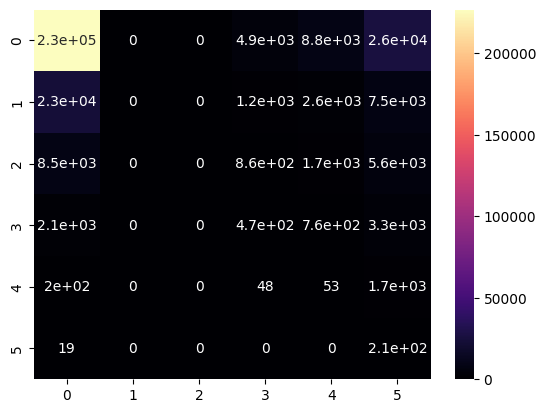

In [60]:
RunModel('2012-01-01',4)


(323232, 54)
(323232,)
(326340, 25)
[LibLinear]0.0    273915
5.0     36029
4.0     16099
3.0       293
2.0         4
dtype: int64
(0.6980969998286289, 0.7184776613348042, 0.7064200826251419, None)
0.7184776613348042


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.00      0.00      0.00     16698
         3.0       0.10      0.00      0.01      6691
         4.0       0.04      0.35      0.08      1957
         5.0       0.00      0.44      0.01       225

    accuracy                           0.72    326340
   macro avg       0.17      0.28      0.16    326340
weighted avg       0.70      0.72      0.71    326340



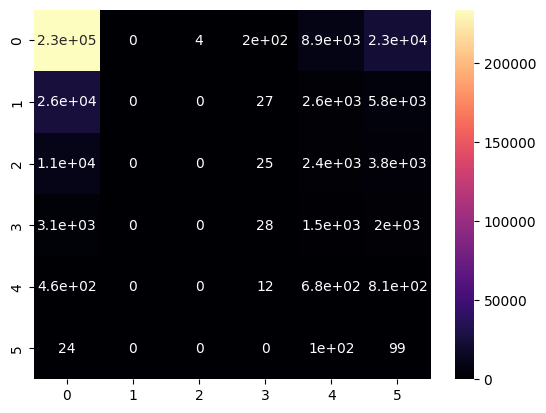

In [61]:
RunModel('2015-01-01',8)


(484848, 54)
(484848,)
(326340, 25)
[LibLinear]0.0    395990
5.0     38630
3.0     26383
4.0     23157
2.0       688
dtype: int64
(0.5919364674321338, 0.6578123453123453, 0.6179833149568181, None)
0.6578123453123453


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83    356366
         1.0       0.00      0.00      0.00     69293
         2.0       0.10      0.00      0.00     30578
         3.0       0.10      0.16      0.12     16519
         4.0       0.05      0.13      0.08      8942
         5.0       0.05      0.66      0.10      3150

    accuracy                           0.66    484848
   macro avg       0.18      0.31      0.19    484848
weighted avg       0.59      0.66      0.62    484848



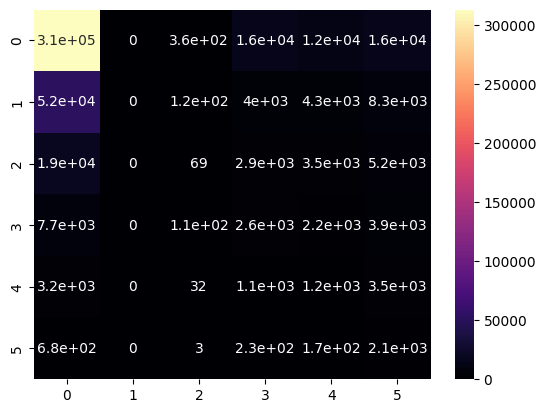

In [36]:
RunModel('2014-01-01',8)


(646464, 54)
(646464,)
(326340, 25)
[LibLinear]0.0    260110
5.0     32730
3.0     16807
4.0     16589
2.0       104
dtype: int64
(0.7145901610341229, 0.6981859410430838, 0.703515451078262, None)
0.6981859410430838


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.07      0.00      0.00     16698
         3.0       0.05      0.12      0.07      6691
         4.0       0.03      0.25      0.05      1957
         5.0       0.01      0.73      0.01       225

    accuracy                           0.70    326340
   macro avg       0.17      0.33      0.17    326340
weighted avg       0.71      0.70      0.70    326340



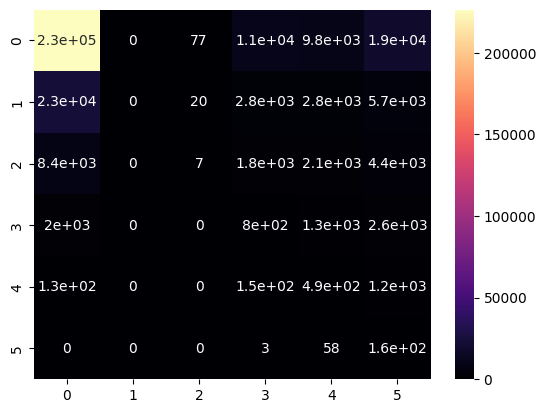

In [63]:
RunModel('2013-01-01',8)


(811188, 54)
(811188,)
(326340, 25)
[LibLinear]0.0    259348
5.0     33508
3.0     20265
4.0     12509
2.0       710
dtype: int64
(0.7138253234508087, 0.6954096954096954, 0.7021056521896968, None)
0.6954096954096954


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86    266217
         1.0       0.00      0.00      0.00     34552
         2.0       0.06      0.00      0.01     16698
         3.0       0.05      0.16      0.08      6691
         4.0       0.01      0.07      0.02      1957
         5.0       0.01      0.76      0.01       225

    accuracy                           0.70    326340
   macro avg       0.17      0.31      0.16    326340
weighted avg       0.71      0.70      0.70    326340



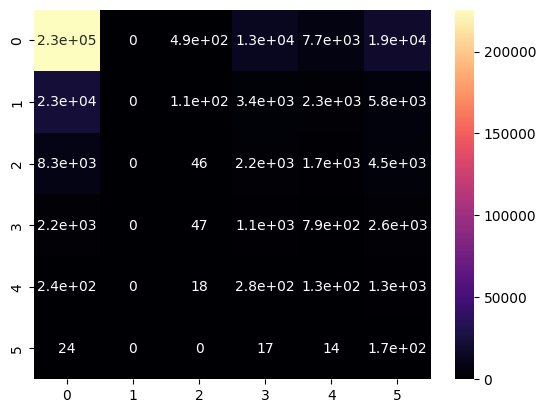

In [64]:
RunModel('2012-01-01',8)


# Diff Models

In [37]:
def RunRFC(date,components):
    train_set = pd.read_csv("learning2.csv")
    test_set = pd.read_csv('modeltesting.csv')
    val_set = pd.read_csv('modelvalidation.csv')
    train_set = train_set[train_set['date']>date]
    print(train_set.shape)
    train_set=train_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    train_set['score']= train_set['score'].apply(np.floor)
    y_train = train_set['score']
    print(y_train.shape)

    train_set=train_set.drop(columns=['score'])
    scaler = StandardScaler()
    scaler.fit(train_set)
    normalized_train_set = scaler.transform(train_set)
    train_set_1 = pd.DataFrame(data=normalized_train_set)
    train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    
    test_set =test_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    scaler = StandardScaler()
    scaler.fit(test_set)
    normalized_test_set = scaler.transform(test_set)
    test_set_1 = pd.DataFrame(data=normalized_test_set)
    test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    print(test_set_1.shape)
    
    pca=PCA(n_components=components)
    train_set_1=pca.fit_transform(train_set_1)
    pca=PCA(n_components=components)
    test_set_1=pca.fit_transform(test_set_1)
    RFC = RandomForestClassifier(max_features=1.0,n_estimators=100,
                                max_depth=20,criterion='entropy',max_samples=0.80,n_jobs=-1)
    RFC.fit(train_set_1,y_train)
    pred = RFC.predict(train_set_1)
    pred = pd.DataFrame(data=pred)
    print(pred.value_counts())
    print(precision_recall_fscore_support(y_train,pred,average='weighted',zero_division=0))
    print(accuracy_score(y_train,pred))
    print(classification_report(y_train,pred))


    # matrix= confusion_matrix(y_test,pred)
    # sns.heatmap(matrix,cmap='magma',annot=True)

(484848, 54)
(484848,)
(326340, 25)
0.0    308944
1.0      8256
2.0      3719
3.0      2435
4.0      2072
5.0       914
dtype: int64
(0.7037999814657816, 0.7917785132070846, 0.7374565870050352, None)
0.7917785132070846
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89    266217
         1.0       0.17      0.04      0.07     34552
         2.0       0.14      0.03      0.05     16698
         3.0       0.09      0.03      0.05      6691
         4.0       0.02      0.02      0.02      1957
         5.0       0.00      0.01      0.00       225

    accuracy                           0.79    326340
   macro avg       0.21      0.18      0.18    326340
weighted avg       0.70      0.79      0.74    326340



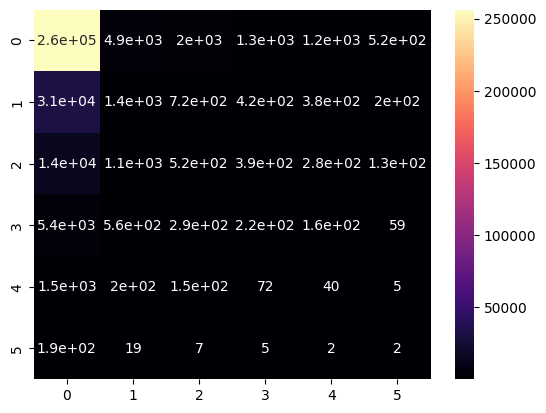

In [71]:
RunRFC('2014-01-01',4)

In [38]:
RunRFC('2012-01-01',8)

(811188, 54)
(811188,)
(326340, 25)
0.0    635573
1.0     60597
2.0     49837
3.0     36513
4.0     22200
5.0      6468
dtype: int64
(0.8870947169829001, 0.8668878237843755, 0.8552249165835384, None)
0.8668878237843755
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91    530072
         1.0       0.99      0.50      0.66    120536
         2.0       0.98      0.65      0.78     74546
         3.0       1.00      0.73      0.84     49571
         4.0       0.99      0.77      0.87     28486
         5.0       0.99      0.81      0.89      7977

    accuracy                           0.87    811188
   macro avg       0.96      0.74      0.83    811188
weighted avg       0.89      0.87      0.86    811188



In [7]:
def RunSVM(date,components):
    train_set = pd.read_csv("learning2.csv")
    test_set = pd.read_csv('modeltesting.csv')
    val_set = pd.read_csv('modelvalidation.csv')
    train_set = train_set[train_set['date']>date]
    print(train_set.shape)
    train_set=train_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    train_set['score']= train_set['score'].apply(np.floor)
    y_train = train_set['score']
    print(y_train.shape)

    train_set=train_set.drop(columns=['score'])
    scaler = StandardScaler()
    scaler.fit(train_set)
    normalized_train_set = scaler.transform(train_set)
    train_set_1 = pd.DataFrame(data=normalized_train_set)
    train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    
#     test_set = test_set[test_set['date']>'2020-01-01']
    test_set =test_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    scaler = StandardScaler()
    scaler.fit(test_set)
    normalized_test_set = scaler.transform(test_set)
    test_set_1 = pd.DataFrame(data=normalized_test_set)
    test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    print(test_set_1.shape)
    
    pca=PCA(n_components=components)
    train_set_1=pca.fit_transform(train_set_1)
    pca=PCA(n_components=components)
    test_set_1=pca.fit_transform(test_set_1)
    SVM = SVC(C=1,kernel='rbf',tol=1e-2,
            class_weight='balanced',verbose=1,cache_size=3072)
    SVM.fit(train_set_1,y_train)
    pred = SVM.predict(test_set_1)
    pred = pd.DataFrame(data=pred)
    print(pred.value_counts())
    print(precision_recall_fscore_support(y_test,pred,average='weighted',zero_division=0))
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    matrix= confusion_matrix(y_test,pred)
    sns.heatmap(matrix,cmap='magma',annot=True)

In [8]:
RunSVM('2016-08-08',4)

(65268, 54)
(65268,)
(161616, 25)
[LibSVM]0.0    61771
1.0    25492
3.0    24181
4.0    18685
2.0    17981
5.0    13506
dtype: int64


ValueError: Found input variables with inconsistent numbers of samples: [326340, 161616]

In [39]:
def RunLR(date,components):
    train_set = pd.read_csv("learning2.csv")
    test_set = pd.read_csv('modeltesting.csv')
    val_set = pd.read_csv('modelvalidation.csv')
    train_set = train_set[train_set['date']>date]
    print(train_set.shape)
    train_set=train_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    train_set['score']= train_set['score'].apply(np.floor)
    y_train = train_set['score']
    print(y_train.shape)

    train_set=train_set.drop(columns=['score'])
    scaler = StandardScaler()
    scaler.fit(train_set)
    normalized_train_set = scaler.transform(train_set)
    train_set_1 = pd.DataFrame(data=normalized_train_set)
    train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    
    # test_set = test_set[test_set['date']>'2020-01-01']
    test_set =test_set.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','fips', 'date','aspectUnknown','CULT_LAND'])
    scaler = StandardScaler()
    scaler.fit(test_set)
    normalized_test_set = scaler.transform(test_set)
    test_set_1 = pd.DataFrame(data=normalized_test_set)
    test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
    print(test_set_1.shape)
    
    pca=PCA(n_components=components)
    train_set_1=pca.fit_transform(train_set_1)
    pca=PCA(n_components=components)
    test_set_1=pca.fit_transform(test_set_1)
    LR = LogisticRegression(max_iter=500,tol=1e-3,n_jobs=-1)
    LR.fit(train_set_1,y_train)
    pred = LR.predict(train_set_1)
    pred = pd.DataFrame(data=pred)
    print(pred.value_counts())
    print(precision_recall_fscore_support(y_train,pred,average='weighted',zero_division=0))
    print(accuracy_score(y_train,pred))
    print(classification_report(y_train,pred))
    matrix= confusion_matrix(y_train,pred)
    sns.heatmap(matrix,cmap='magma',annot=True)

(484848, 54)
(484848,)
(326340, 25)
0.0    483382
3.0       846
2.0       462
4.0       158
dtype: int64
(0.5583427420649785, 0.7345332970332971, 0.6240047158269046, None)
0.7345332970332971


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85    356366
         1.0       0.00      0.00      0.00     69293
         2.0       0.11      0.00      0.00     30578
         3.0       0.22      0.01      0.02     16519
         4.0       0.14      0.00      0.00      8942
         5.0       0.00      0.00      0.00      3150

    accuracy                           0.73    484848
   macro avg       0.20      0.17      0.15    484848
weighted avg       0.56      0.73      0.62    484848



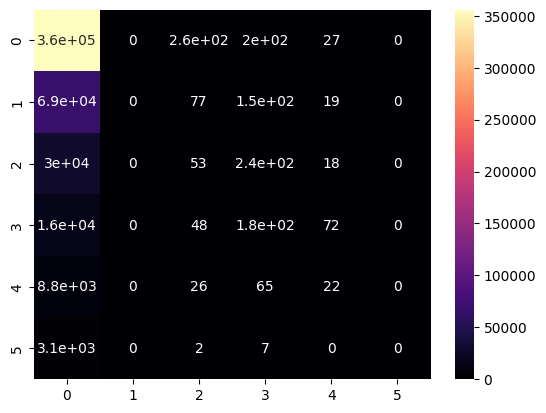

In [40]:
RunLR('2014-01-01',8)